# **Project:4 Churn Analysis in Telecom Industry**

# **Problem Statement**

Customer churn occurs when customers or subscribers stop doing business with a company or service, also known as customer attrition. It is also referred as loss of clients or customers. One industry in which churn rates are particularly useful is the telecommunications industry, because most customers have multiple options from which to choose within a geographic location.

We are going to build classification models using decision tree algorithm to predict whether the customer be churned or not on the basis of its billing information and customer demographics.

# **Data Description**

In [1]:
#Input Variables

#Gender: This column describes about customers gender details. Value of this column is "Male" or “Female" 

#SeniorCitizen: This column describes whether a customer is a senior citizen or not. Value of this column is "Yes" or "No" 

#Partner: This column describes whether a customer has a partner or not. Value of this column is "Yes" or "No" 

#Dependents: It describes whether a customer dependents or not. Value of this column is "Yes" or "No" 

#Tenure: This column describes how many months a customer got a telephone connection. Value of this column is integer 

#Call Service: This column describes whether a customer has a phone service with their connection or not. Value of this column is "Yes" or "No" 

#Multiple Connections: This column describes whether a customer has single or multiple connection. Value of this column is "Yes" or "No" 

#Internet Connection: This column describes whether a customer has an internet connection with their telephone connection or not.Value of this column is "Yes" or "No" 

#Online Security: This column describes whether a customer has online security for internet connection or not. Value of this column is "Yes" or "No" 

#Online Backup: Some customer wants to save their data in online storage. This column describes whether a customer has an online backup service or no. Value of this column is "Yes" or "No" 

#Device Protection Service: Customer wants to protect their device from virus and other attack. So they might have device protection service which is got with telephone service. So this column describes whether a customer has device protection service or not.Value of this column is "Yes" or "No" 

#Technical Help: If a customer wants technical help, they must have registered with their connection. So this column describes whether a customer has technical help service or not. Value of this column is "Yes" or "No" 

#Online TV: Some customer might watch a TV program online. This column describes whether a customer is subscribed with online TV service or not. Value of this column is "Yes" or "No" 

#Online Movies: Some customer might watch online movies. This column describes whether a customer is subscribed with online movies service or not. Value of this column is "Yes" or "No" 

#Agreement: A customer might have a month to month agreement or one-year connection or two-year connection and so on. This column describes a customer agreement type 

#Value of this column is "Month-to-Month", "One year" and " Two years". 

#Billing Method: This column describes whether a customer wants paperless billing or not. Value of this column is "Yes" or "No" 

#Payment Method: This column describes in which payment way a customer will pay like Bank transfer(automatic), Credit card(automatic), Electronic check and Mailed check 

#Value of this column is Bank transfer(automatic), Credit card(automatic), Electronic check and Mailed check.Monthly 18 - Service Charge: This column describes how much will be charged from a customer for their connection. Value of this column is numeric 

#Total Amount: This column describes how much a customer has to pay totally for their connection. Value of this column is numeric 

#Target Variable

#Churn: This column describes a customer is churn or not. Value of this column is "Yes" or "No" 


# **Model Selection** 

we select the best model. Model selection will be based on Accuracy, Sensitivity, Specificity, Positive predictive value, Negative predictive value, Prevalence, Detection rate, Detection prevalence and balanced accuracy.

# **Expected Outcome**

Higher accuracy in predicting the outcome using test data.

# **Installing required packages**

In [2]:
#install.packages("plyr")

#install.packages("ggplot2")

#install.packages("caret")

#install.packages("MASS")

#install.packages("party")

#install.packages("RcolorBrewer")

#install.packages("ROCR")

#install.packages("rpart")

#install.packages("rattle")

#install.packages("rpart.plot")

# **Loading packages**

In [3]:
library(plyr)

library(ggplot2)

library(lattice)

library(caret)

library(MASS)

library(party)

library(RColorBrewer)

library(ROCR)

library(rpart)

library(rattle)

library(rpart.plot)


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress


Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4


Attaching package: ‘modeltools’


The following object is masked from ‘package:plyr’:

    empty


Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



# **Loading Dataset**

In [4]:
df <- read.csv("../input/churn-analysis-in-telecom-industry-dataset/churn.csv")

In [5]:
#Running head command to see first 6 rows

head(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,⋯,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,2907-ILJBN,Female,0,Yes,Yes,11,Yes,No,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,No
2,3896-RCYYE,Female,0,No,No,67,No,No phone service,DSL,No,⋯,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),53.40,3579.15,No
3,9764-REAFF,Female,0,Yes,No,59,Yes,No,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),18.40,1057.85,No
4,6651-RLGGM,Male,0,Yes,Yes,67,Yes,Yes,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.30,1688.90,No
5,5879-SESNB,Female,0,No,No,11,Yes,Yes,Fiber optic,No,⋯,No,No,No,No,Month-to-month,No,Electronic check,75.25,888.65,No
6,8670-MEFCP,Female,0,Yes,Yes,36,Yes,Yes,DSL,Yes,⋯,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),92.90,3379.25,No


In [6]:
#Running tail command to last 6 rows

tail(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,⋯,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
12330,6894-LFHLY,Female,0.07703193,Yes,No,7.460777,Yes,No,Fiber optic,No internet service,⋯,No internet service,No,No,No,Month-to-month,Yes,Electronic check,24.06379,139.66554,Yes
12331,6894-LFHLY,Male,0.35742330,No,Yes,2.927730,Yes,No,Fiber optic,No,⋯,No,No,No internet service,No internet service,Month-to-month,Yes,Mailed check,40.15125,76.13555,Yes
12332,0639-TSIQW,Female,0.00000000,No,No,63.430477,No,No phone service,Fiber optic,Yes,⋯,Yes,No,No,No,Month-to-month,No,Credit card (automatic),96.25219,6310.29260,Yes
12333,0639-TSIQW,Male,0.00000000,No,Yes,49.677352,No,No phone service,Fiber optic,Yes,⋯,Yes,No,No,No,Month-to-month,No,Credit card (automatic),70.44598,4091.16854,Yes
12334,0607-DAAHE,Male,0.66000182,Yes,Yes,20.659911,Yes,No,No,No internet service,⋯,No,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,55.81910,560.15364,Yes
12335,1038-ZAGBI,Female,0.43385552,Yes,No,8.529156,Yes,No,Fiber optic,No internet service,⋯,No internet service,No internet service,No,No internet service,One year,Yes,Mailed check,43.48851,263.00688,Yes


In [7]:
#Running structure command

str(df)

'data.frame':	12335 obs. of  21 variables:
 $ customerID             : Factor w/ 5590 levels "0002-ORFBO","0004-TLHLJ",..: 1573 2155 5463 3755 3292 4852 5474 508 2771 4140 ...
 $ gender                 : Factor w/ 2 levels "Female","Male": 1 1 1 2 1 1 1 1 2 2 ...
 $ SeniorCitizen          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner                : Factor w/ 2 levels "No","Yes": 2 1 2 2 1 2 2 1 1 1 ...
 $ Dependents             : Factor w/ 2 levels "No","Yes": 2 1 1 2 1 2 2 1 1 1 ...
 $ tenure                 : num  11 67 59 67 11 36 49 54 26 19 ...
 $ CallService            : Factor w/ 2 levels "No","Yes": 2 1 2 2 2 2 2 2 2 2 ...
 $ MultipleConnections    : Factor w/ 3 levels "No","No phone service",..: 1 2 1 3 3 3 1 1 3 1 ...
 $ InternetConnection     : Factor w/ 3 levels "DSL","Fiber optic",..: 3 1 3 3 2 1 1 2 2 3 ...
 $ OnlineSecurity         : Factor w/ 3 levels "No","No internet service",..: 2 1 2 2 1 3 3 3 1 2 ...
 $ OnlineBackup           : Factor w/ 3 levels "No","No internet se

**Total 12335 observations with 21 variables present in our churn.csv dataset.Maximum we have factor variables with 2,3 and 4 levels.**

# **Checking for missing values** 

**Loading Amelia package for missmap**

In [8]:
install.packages("Amelia") 
library(Amelia)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘Amelia’ is not available (for R version 3.6.3)”
Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2020 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



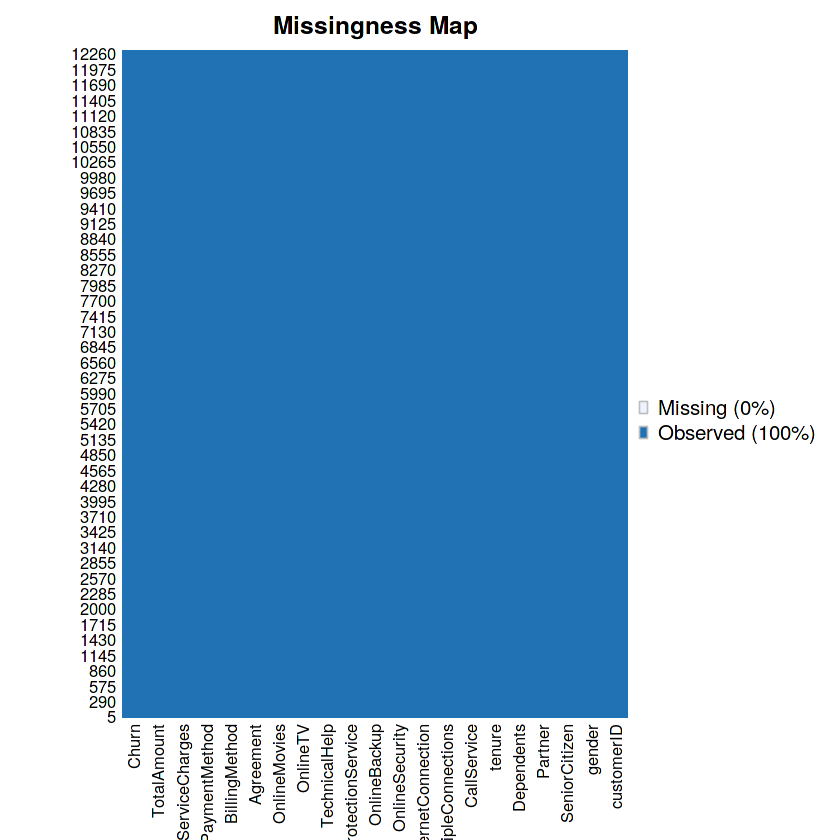

In [9]:
missmap(df)

**No missing value present in our dataset.**

In [10]:
colSums(is.na(df))

customerID                  gender           SeniorCitizen 
                      0                       0                       0 
                Partner              Dependents                  tenure 
                      0                       0                       0 
            CallService     MultipleConnections      InternetConnection 
                      0                       0                       0 
         OnlineSecurity            OnlineBackup DeviceProtectionService 
                      0                       0                       0 
          TechnicalHelp                OnlineTV            OnlineMovies 
                      0                       0                       0 
              Agreement           BillingMethod           PaymentMethod 
                      0                       0                       0 
  MonthlyServiceCharges             TotalAmount                   Churn 
                      0                       0                       0

**This also confirms that our dataset contain no NA values.**

In [11]:
#Total number of customers

length(df$customerID)

[1] 12335

**We have total 12335 customers present in our dataset.**

# **Visualisation** 

In [12]:
#Number of Female and Male
count(df$gender)

x,freq
<fct>,<int>
Female,6216
Male,6119


**We have 6216 female and 6119 male present in dataset.**

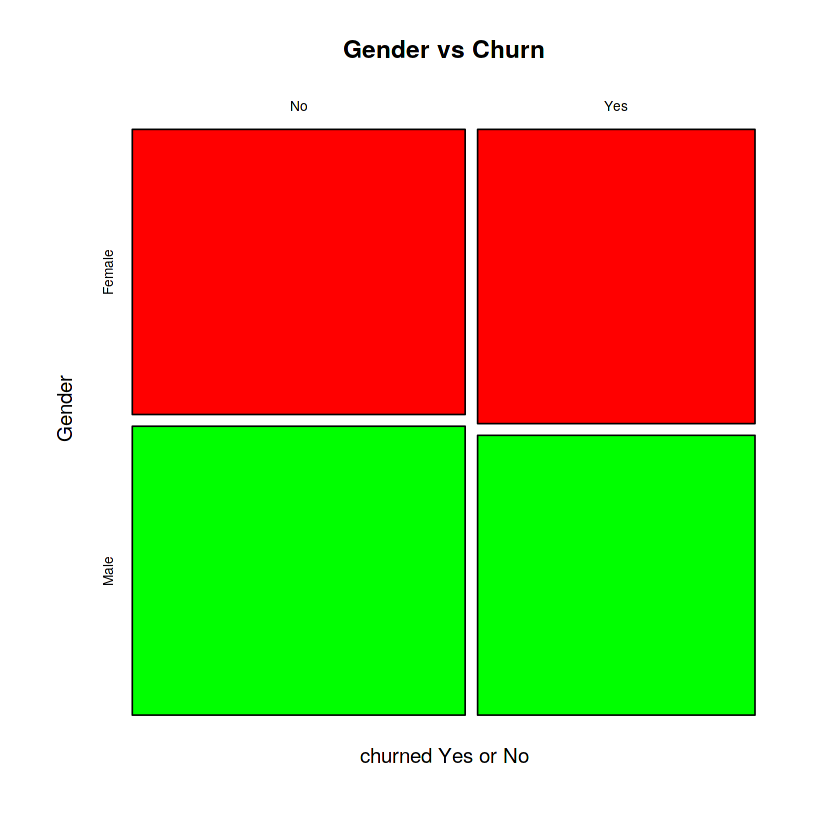

In [13]:
#Gender vs Churn

plot(table(df$Churn, df$gender), col=c("red","green"),
      xlab = "churned Yes or No", ylab = "Gender", main = "Gender vs Churn")


**Churn is almost same in case of female and male, So gender is not very much influencing variable to churn.**

In [14]:
#Number of customers having partner
table(df$Partner)


  No  Yes 
6105 6230 

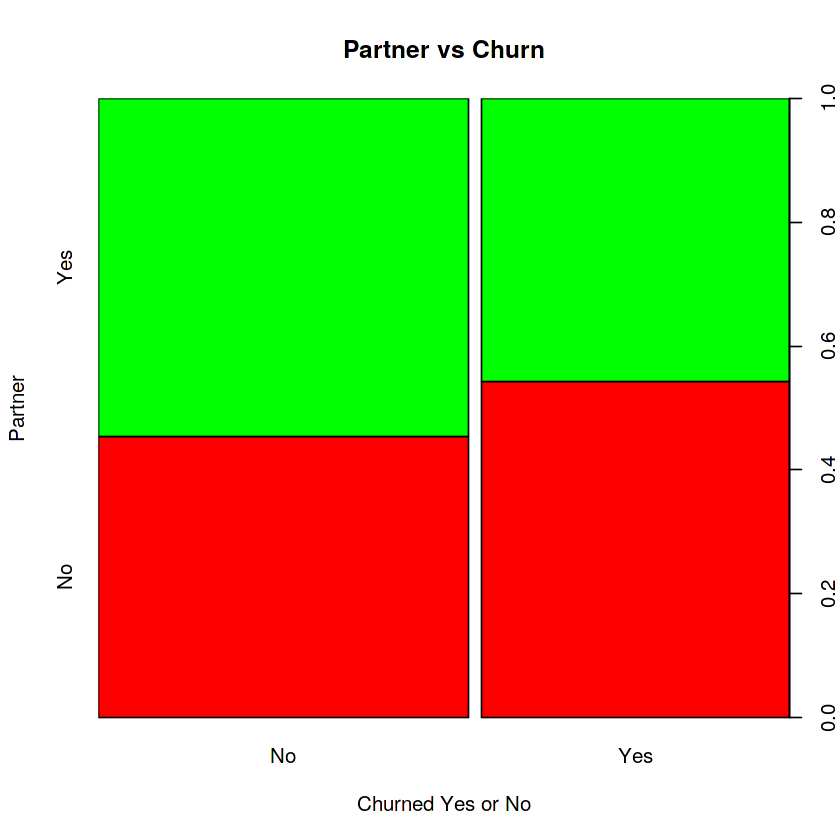

In [15]:
#Partner vs Churn


plot(df$Churn, df$Partner, col=c("red","green"),
     xlab = "Churned Yes or No", ylab = "Partner", main = "Partner vs Churn")


**From above plot we can see that customers having partner has churned less than those who do not have partner.**

In [16]:
#Customers having dependents
table(df$Dependents)


  No  Yes 
7974 4361 

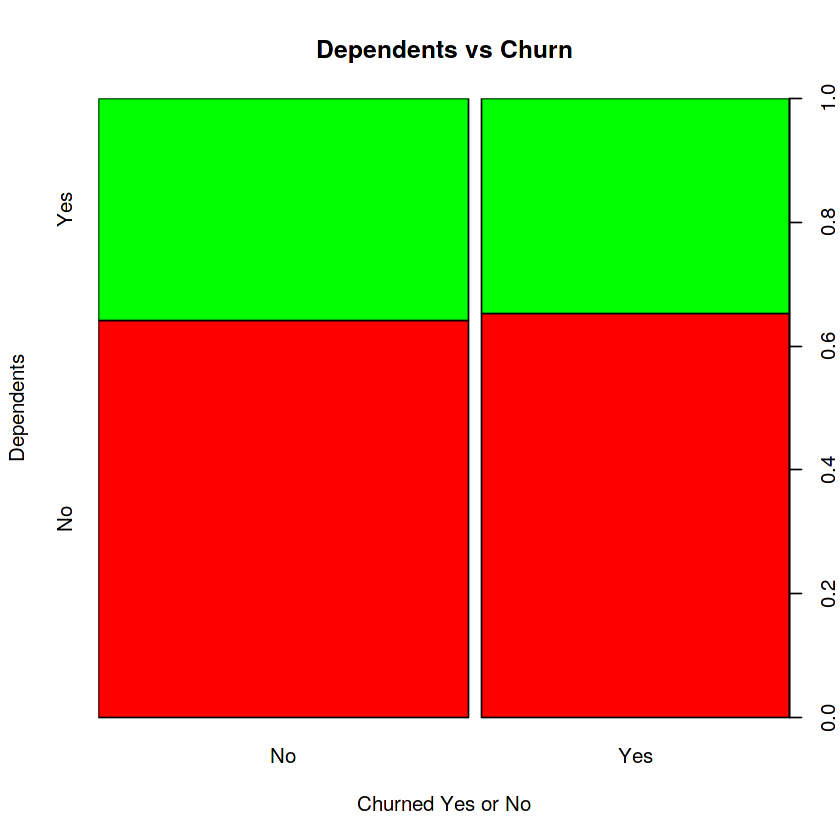

In [17]:
#Dependents vs Churn

plot(df$Churn, df$Dependents, col=c("red","green"),
     xlab = "Churned Yes or No", ylab = "Dependents", main = "Dependents vs Churn")


In [18]:
#Summary of tenure
summary(df$tenure)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    8.00   24.00   29.53   49.00   72.00 

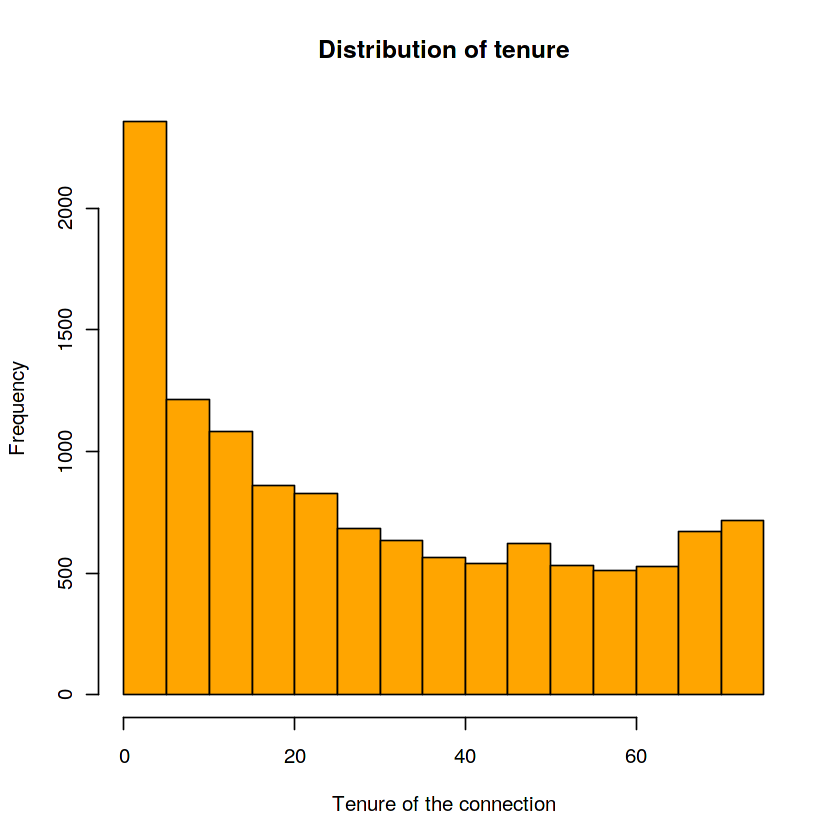

In [19]:
#Histogram of tenure
hist(df$tenure, col = "orange", xlab = "Tenure of the connection", main = "Distribution of tenure")

**Maximum tenure of connection is between 0 to 10 months.**

In [20]:
#Number of customers subscribed to call service
table(df$CallService)


   No   Yes 
 1402 10933 

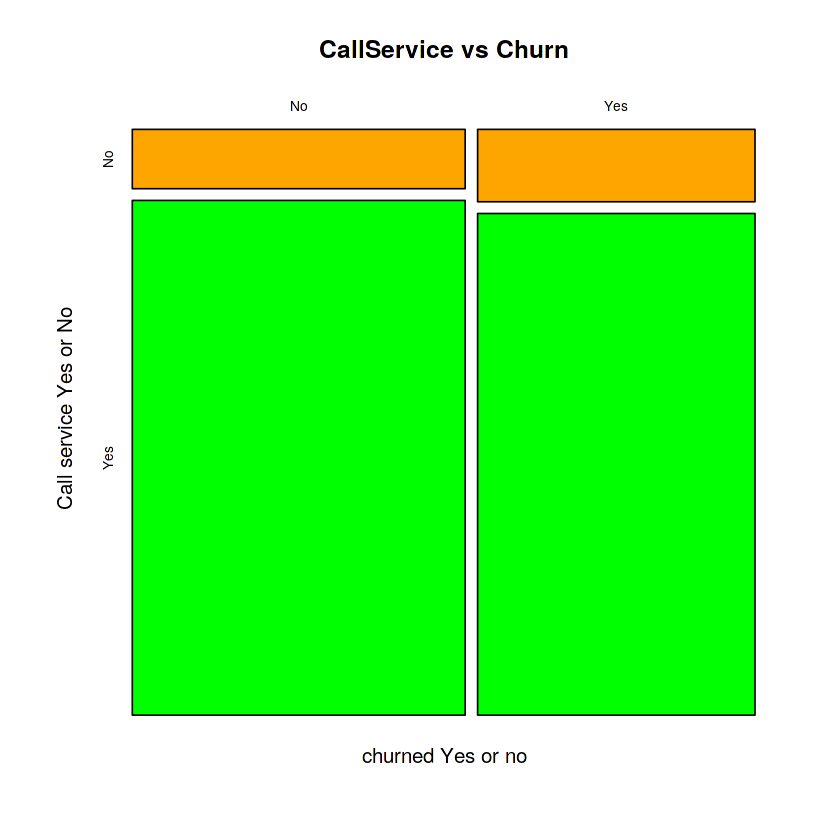

In [21]:
plot(table(df$Churn, df$CallService), xlab= "churned Yes or no",
     ylab = "Call service Yes or No", col = c("orange", "green"), main = "CallService vs Churn")

In [22]:
#Multipleconnection

table(df$MultipleConnections)


              No No phone service              Yes 
            5952             1425             4958 

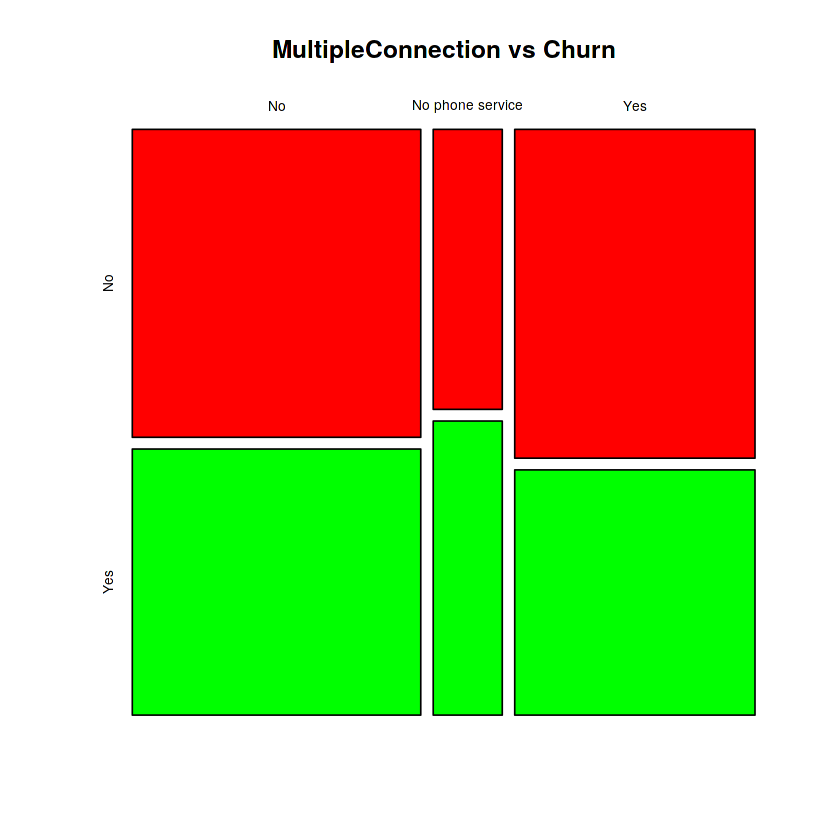

In [23]:
#MultipleConnection vs Churn

plot(table(df$MultipleConnections, df$Churn), col = c("red", "green"), main = "MultipleConnection vs Churn")

In [24]:
#Type of InternetConnection

table(df$InternetConnection)


        DSL Fiber optic          No 
       4130        4995        3210 

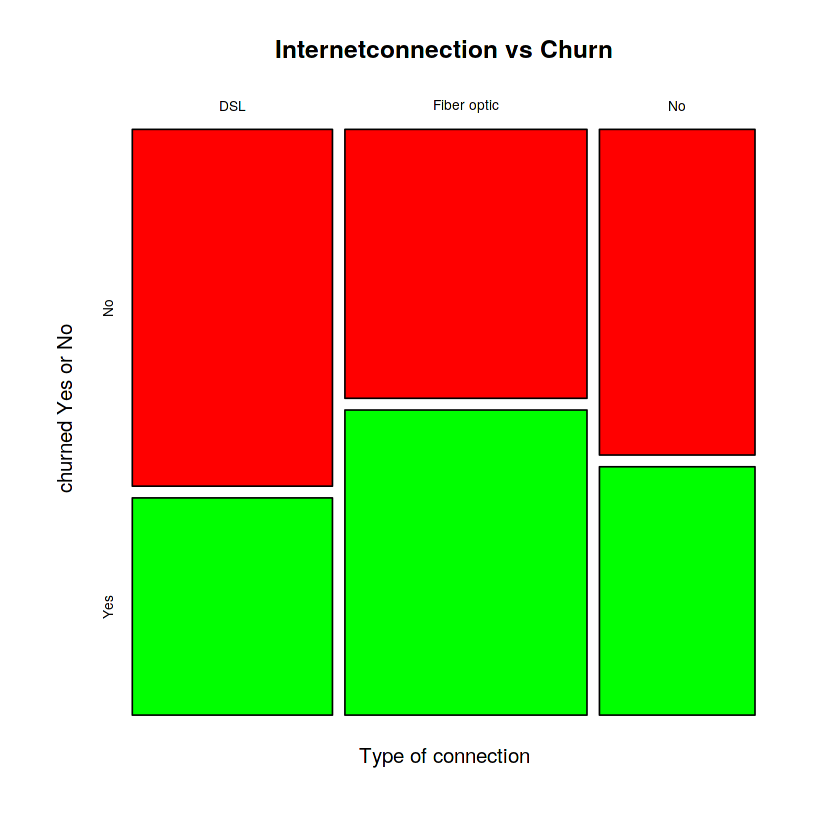

In [25]:
#InternetConnection vs Churn
plot(table(df$InternetConnection, df$Churn), 
     xlab = "Type of connection", ylab = "churned Yes or No", 
     main = "Internetconnection vs Churn", col = c("red", "green"))


**People having fiber optic internetconnection has churned more.**

In [26]:
#OnlineSecurity

table(df$OnlineSecurity)


                 No No internet service                 Yes 
               5773                3233                3329 

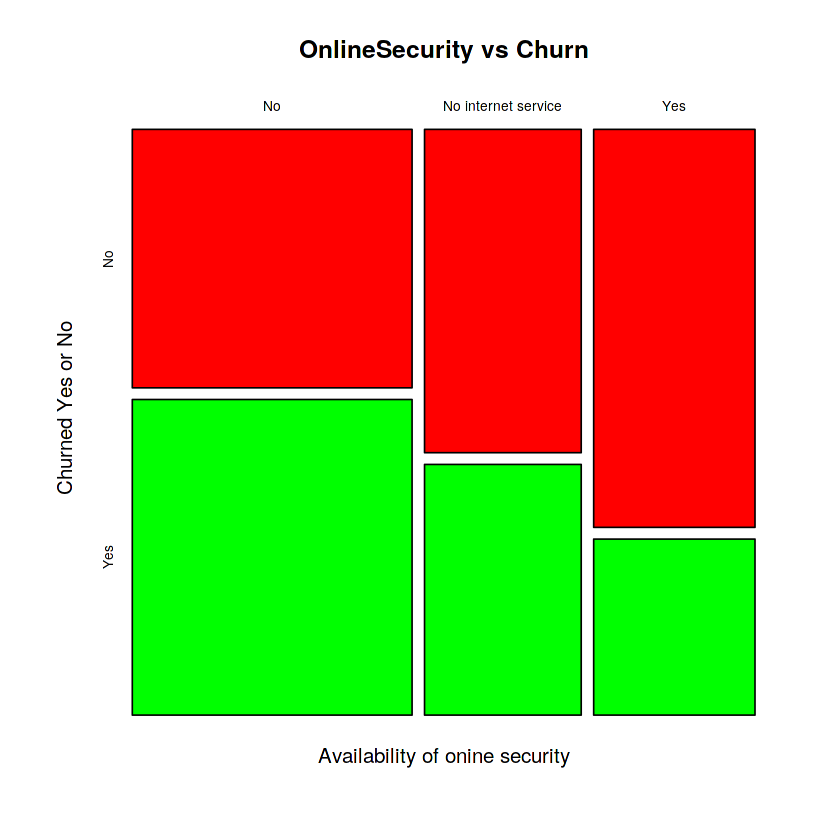

In [27]:
#OnlineSecurity vs Churn

plot(table(df$OnlineSecurity, df$Churn), 
     xlab = "Availability of onine security",ylab = "Churned Yes or No",
     col = c("red","green"), main = "OnlineSecurity vs Churn")

**Customers having no online security has churned more.**

In [28]:
#OnlineBackup

table(df$OnlineBackup)


                 No No internet service                 Yes 
               5118                3227                3990 

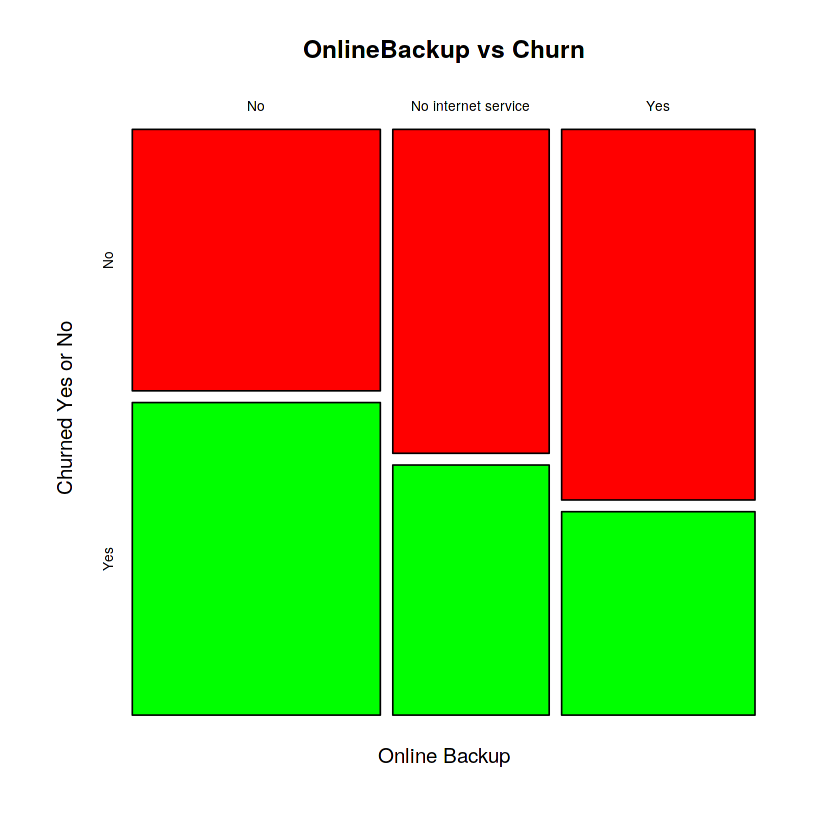

In [29]:
#OnlineBackup vs Cjurn

plot(table(df$OnlineBackup, df$Churn), 
     xlab = "Online Backup",ylab = "Churned Yes or No",
     col = c("red","green"), main = "OnlineBackup vs Churn")


In [30]:
#DeviceProtectionservice

table(df$DeviceProtectionService)


                 No No internet service                 Yes 
               5173                3241                3921 

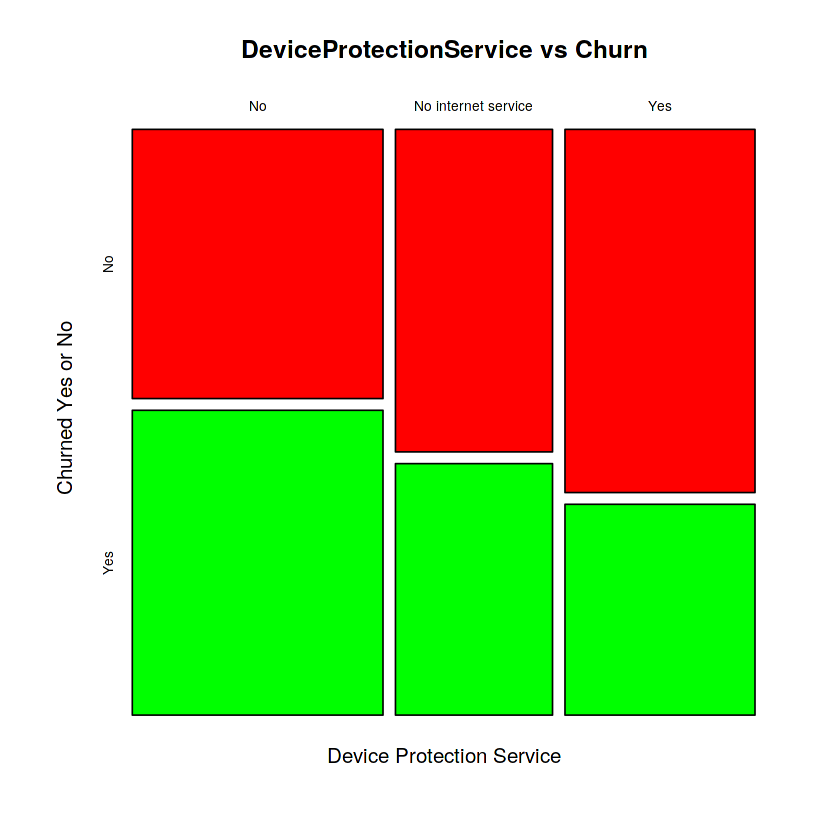

In [31]:
#DeviceProtectionService vs Churn

plot(table(df$DeviceProtectionService, df$Churn), 
     xlab = "Device Protection Service",ylab = "Churned Yes or No",
     col = c("red","green"), main = "DeviceProtectionService vs Churn")

In [32]:
#TechnicalHelp

table(df$TechnicalHelp)


                 No No internet service                 Yes 
               5863                3214                3258 

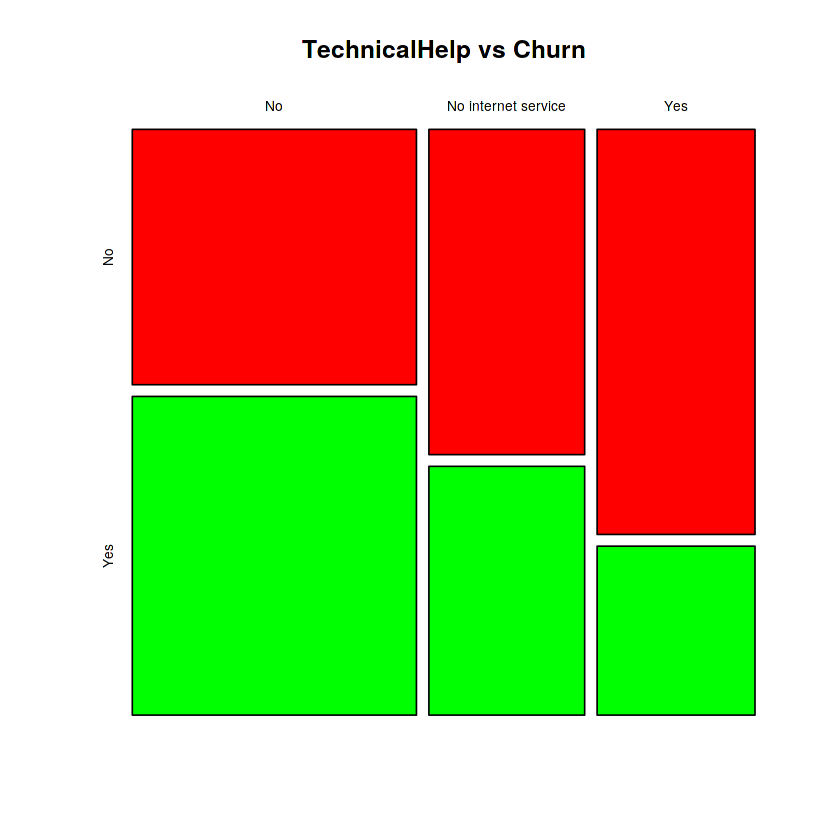

In [33]:
#TechnicalHelp vs Churn

plot(table(df$TechnicalHelp, df$Churn),col = c("red","green"), main = "TechnicalHelp vs Churn")

In [34]:
#OnlineTv

table(df$OnlineTV)


                 No No internet service                 Yes 
               4592                3245                4498 

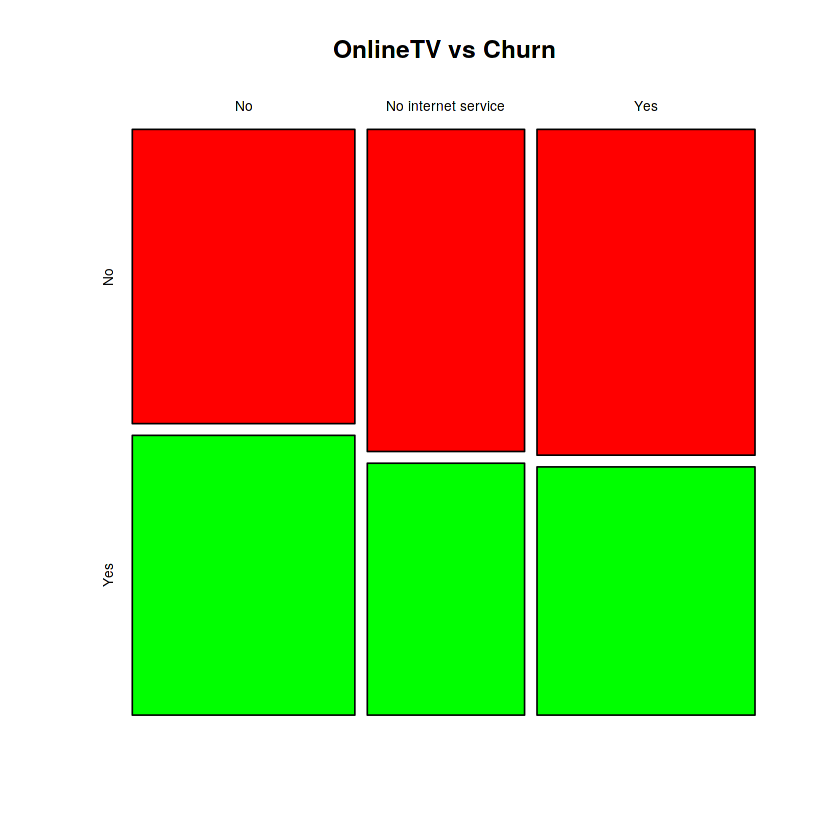

In [35]:
#OnlineTv vs Churn

plot(table(df$OnlineTV, df$Churn),col = c("red","green"), main = "OnlineTV vs Churn")


In [36]:
#OnlineMovies

table(df$OnlineMovies)


                 No No internet service                 Yes 
               4620                3222                4493 

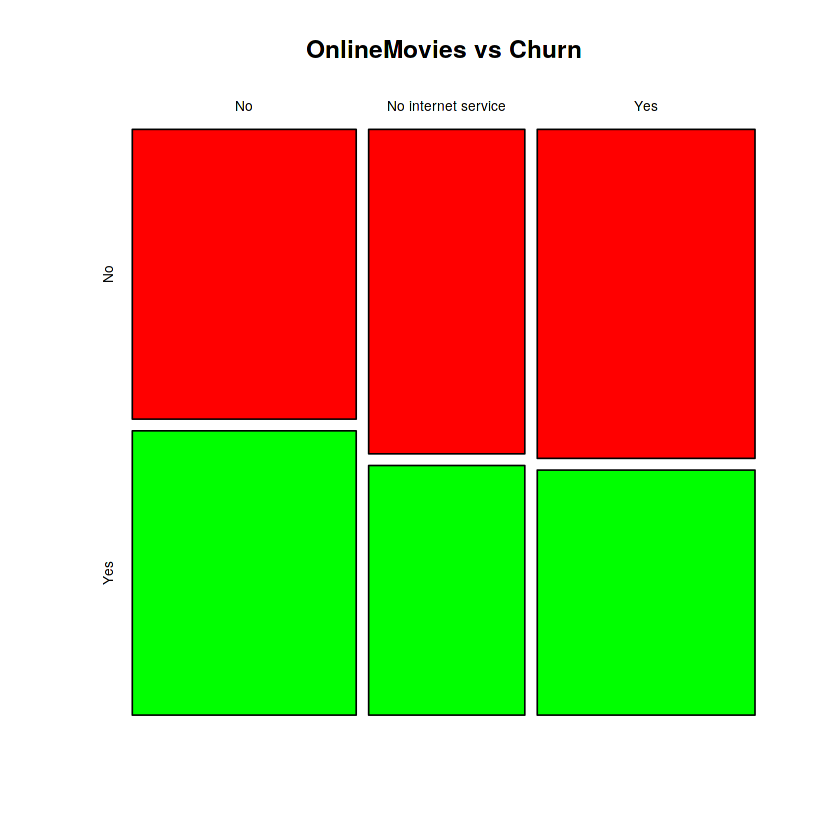

In [37]:
#OnlineMovies vs Churn

plot(table(df$OnlineMovies, df$Churn),col = c("red","green"), main = "OnlineMovies vs Churn")


In [38]:
#Agreement

table(df$Agreement)


Month-to-month       One year       Two year 
          7058           2692           2585 

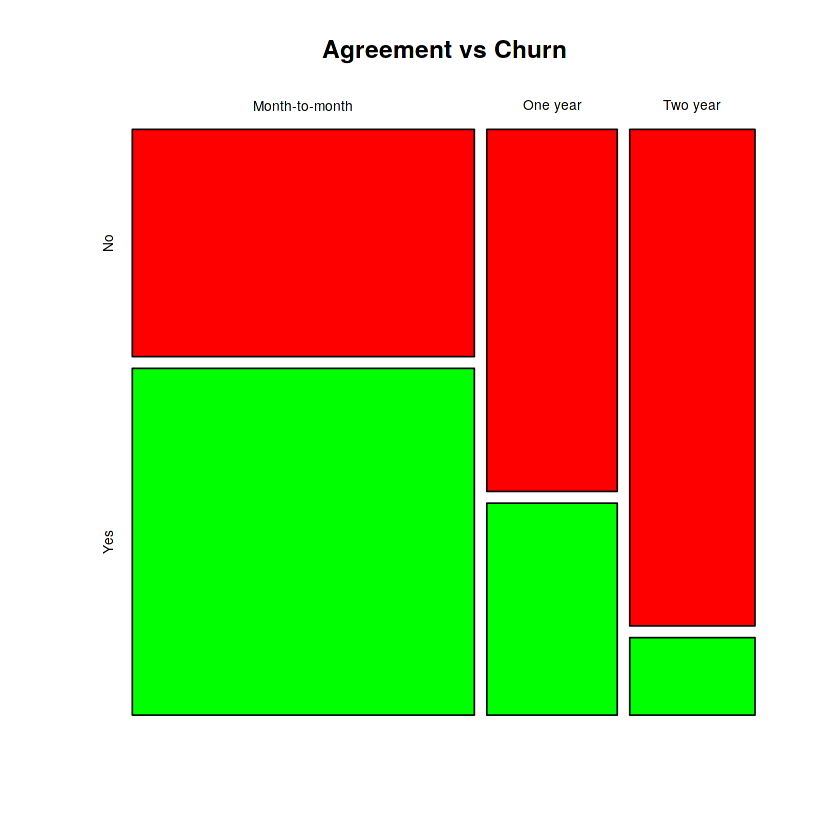

In [39]:
#Agreement vs Churn

plot(table(df$Agreement, df$Churn),col = c("red","green"), main ="Agreement vs Churn")

**Customers subscribing two year plan has churned very less in comparison to month-to-month and one year.**

In [40]:
#BillingMethod

table(df$BillingMethod)


  No  Yes 
5282 7053 

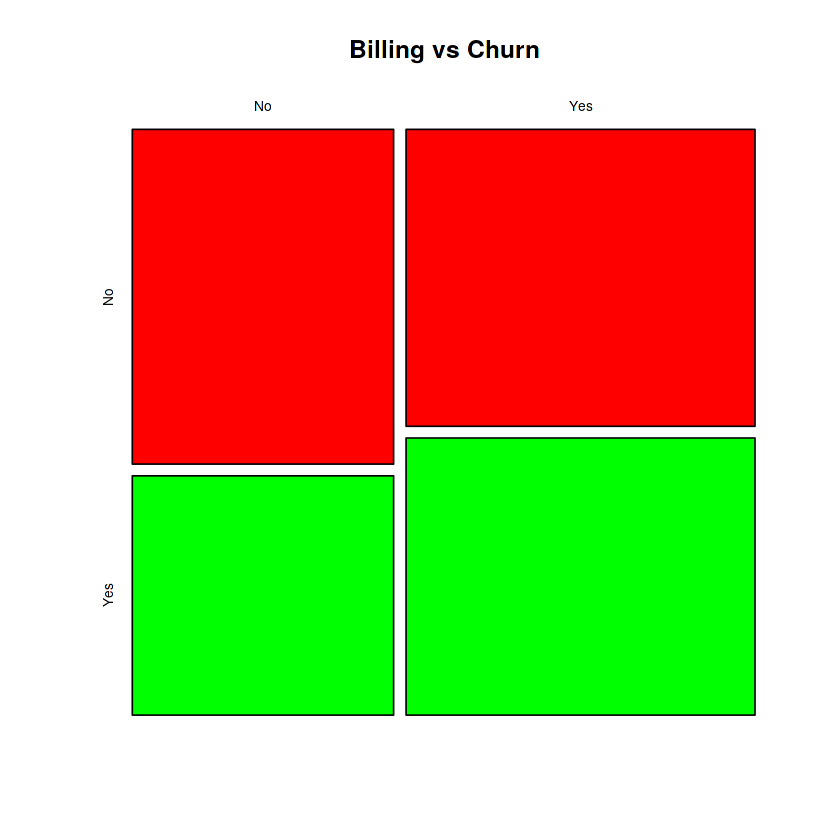

In [41]:
#Billing vs Churn

plot(table(df$BillingMethod, df$Churn),col = c("red","green"), main = "Billing vs Churn")

In [42]:
#PaymentMethod

table(df$PaymentMethod)


Bank transfer (automatic)   Credit card (automatic)          Electronic check 
                     2758                      2535                      4013 
             Mailed check 
                     3029 

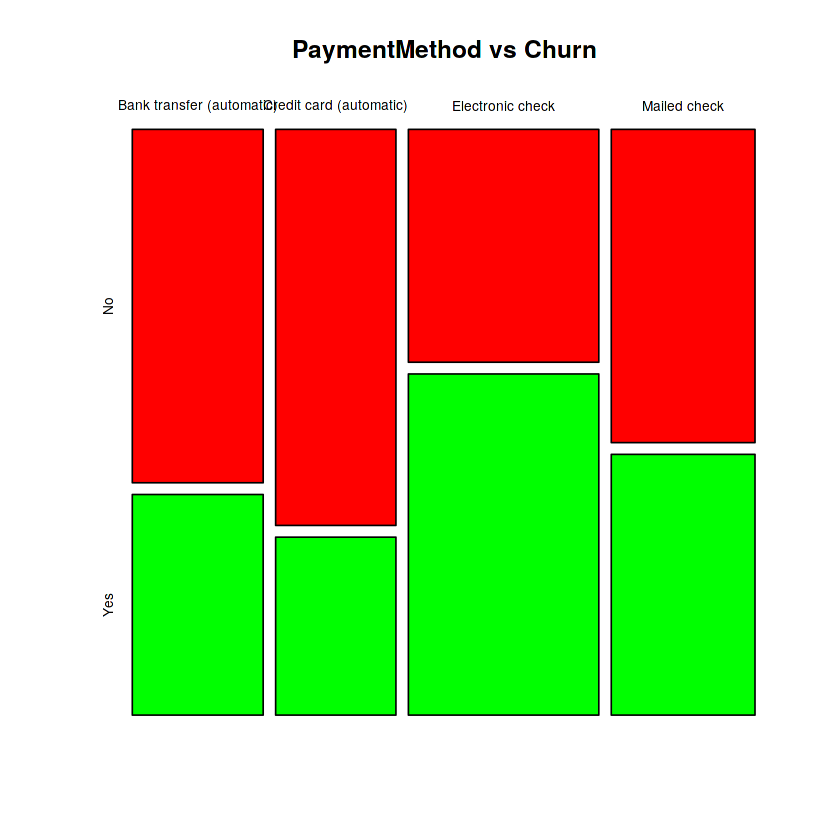

In [43]:
#PaymentMethod vs Churn

plot(table(df$PaymentMethod, df$Churn),col = c("red","green"), main = "PaymentMethod vs Churn")

In [44]:
#MonthlyServiceCharges

str(df$MonthlyServiceCharges)

summary(df$MonthlyServiceCharges)

 num [1:12335] 20.6 53.4 18.4 26.3 75.2 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.25   33.89   64.36   61.50   85.00  118.75 

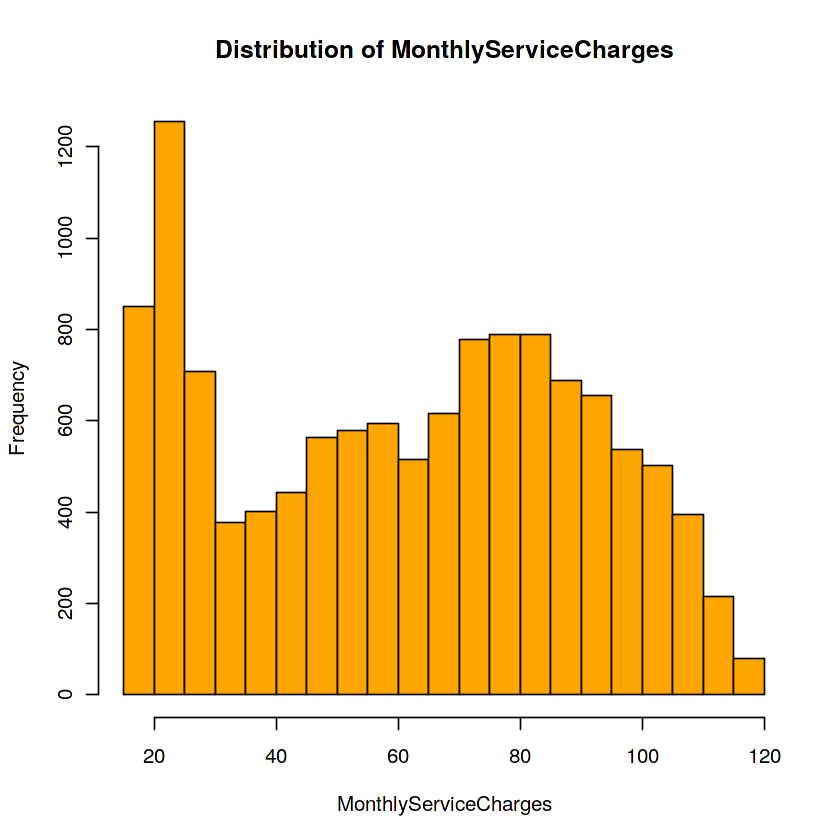

In [45]:
#Histogram of MonthlyServiceCharges

hist(df$MonthlyServiceCharges,col = "orange", main = "Distribution of MonthlyServiceCharges",
    xlab="MonthlyServiceCharges")

In [46]:
#TotalAmount

str(df$TotalAmount)

summary(df$TotalAmount)

 num [1:12335] 234 3579 1058 1689 889 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   18.8   352.7  1209.2  2032.3  3168.8  8684.8 

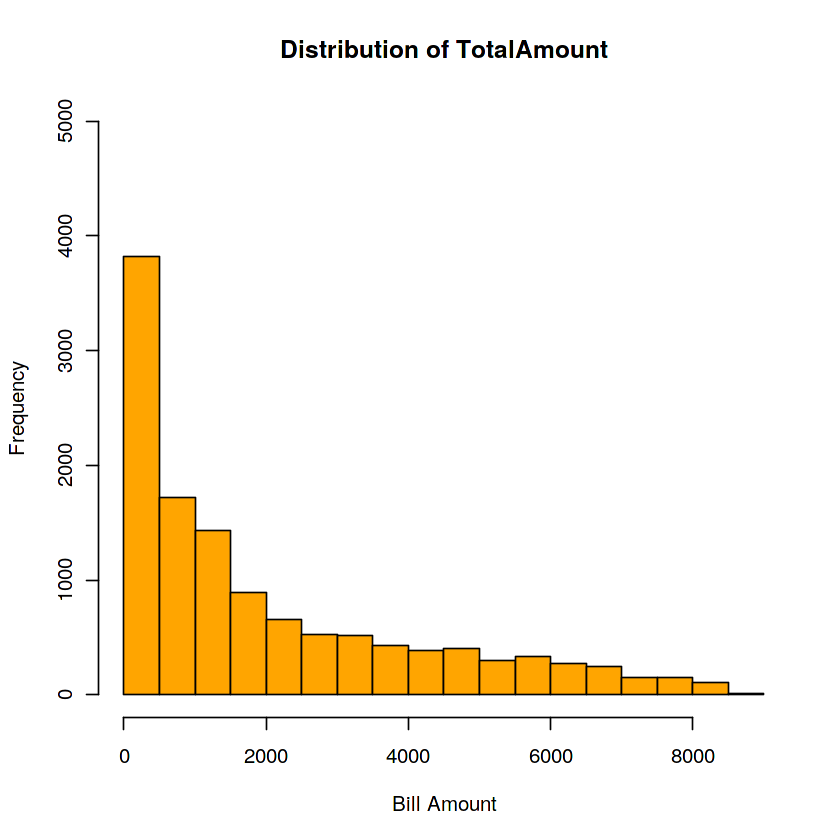

In [47]:
#Histogram of TotalAmount

hist(df$TotalAmount,col = "orange", xlab = "Bill Amount", ylim = c(0,5000), main = "Distribution of TotalAmount")

In [48]:
#customers who churned

table(df$Churn)


  No  Yes 
6728 5607 

**Based on the result of the count each column change no internet service to "No" for six columns**

**They are: "OnlineSecrity", "OnlineBackup","Device Protection", technicalHelp","Online TV", "OnlineMovie"**

In [49]:
#Making a list of those columns.

cols_name <- c(10:15) 

#Changing "No internet Srvice" to "No" for those columns

 for (i in 1:ncol(df[,cols_name])){
   df[,cols_name][,i]<- as.factor(mapvalues
                                                 (df[,cols_name][,i],from = c("No internet service"), to = c("No")))} 

In [50]:
str(df)

'data.frame':	12335 obs. of  21 variables:
 $ customerID             : Factor w/ 5590 levels "0002-ORFBO","0004-TLHLJ",..: 1573 2155 5463 3755 3292 4852 5474 508 2771 4140 ...
 $ gender                 : Factor w/ 2 levels "Female","Male": 1 1 1 2 1 1 1 1 2 2 ...
 $ SeniorCitizen          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner                : Factor w/ 2 levels "No","Yes": 2 1 2 2 1 2 2 1 1 1 ...
 $ Dependents             : Factor w/ 2 levels "No","Yes": 2 1 1 2 1 2 2 1 1 1 ...
 $ tenure                 : num  11 67 59 67 11 36 49 54 26 19 ...
 $ CallService            : Factor w/ 2 levels "No","Yes": 2 1 2 2 2 2 2 2 2 2 ...
 $ MultipleConnections    : Factor w/ 3 levels "No","No phone service",..: 1 2 1 3 3 3 1 1 3 1 ...
 $ InternetConnection     : Factor w/ 3 levels "DSL","Fiber optic",..: 3 1 3 3 2 1 1 2 2 3 ...
 $ OnlineSecurity         : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 2 1 1 ...
 $ OnlineBackup           : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 1 2 1 1 ...
 $ 

In [51]:
table(df$OnlineBackup)


  No  Yes 
8345 3990 

In [52]:
#Changing "No phone service" to "No" in MultipleConnections Column
df$MultipleConnections <- as.factor(mapvalues(df$MultipleConnections,from=c("No phone service"),to = c("No")))

In [53]:
str(df)

'data.frame':	12335 obs. of  21 variables:
 $ customerID             : Factor w/ 5590 levels "0002-ORFBO","0004-TLHLJ",..: 1573 2155 5463 3755 3292 4852 5474 508 2771 4140 ...
 $ gender                 : Factor w/ 2 levels "Female","Male": 1 1 1 2 1 1 1 1 2 2 ...
 $ SeniorCitizen          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner                : Factor w/ 2 levels "No","Yes": 2 1 2 2 1 2 2 1 1 1 ...
 $ Dependents             : Factor w/ 2 levels "No","Yes": 2 1 1 2 1 2 2 1 1 1 ...
 $ tenure                 : num  11 67 59 67 11 36 49 54 26 19 ...
 $ CallService            : Factor w/ 2 levels "No","Yes": 2 1 2 2 2 2 2 2 2 2 ...
 $ MultipleConnections    : Factor w/ 2 levels "No","Yes": 1 1 1 2 2 2 1 1 2 1 ...
 $ InternetConnection     : Factor w/ 3 levels "DSL","Fiber optic",..: 3 1 3 3 2 1 1 2 2 3 ...
 $ OnlineSecurity         : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 2 1 1 ...
 $ OnlineBackup           : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 1 2 1 1 ...
 $ DeviceProtection

**Now we succesfully changed "No internet service" and "No phone service" to No.**

In [54]:
table(df$SeniorCitizen)


          0 0.003857827  0.00465552 0.006524713 0.008518171 0.008563273 
      10016           1           1           1           1           1 
0.008908875 0.010998659 0.011698099 0.012328669 0.013113638 0.013501396 
          1           1           1           1           1           1 
0.013558515 0.014229723  0.01556298 0.017082523  0.02047418  0.02059616 
          1           1           1           1           1           1 
0.021272866 0.023845578 0.025250689 0.025826494 0.026318367 0.028499586 
          1           1           1           1           1           1 
0.028762124 0.029793944 0.031514167 0.031709892  0.03204944 0.032241194 
          1           1           1           1           1           1 
0.032586338 0.033442283 0.034359743 0.034574792 0.034883993 0.038973481 
          1           1           1           1           1           1 
0.042720959 0.051435794 0.051815482 0.054826488 0.055136558 0.055211132 
          1           1           1           1   

In [55]:
#Removing columns which are not very significant for our analysis

df$SeniorCitizen <- NULL

df$customerID <- NULL

df$gender <- NULL

In [56]:
str(df)

'data.frame':	12335 obs. of  18 variables:
 $ Partner                : Factor w/ 2 levels "No","Yes": 2 1 2 2 1 2 2 1 1 1 ...
 $ Dependents             : Factor w/ 2 levels "No","Yes": 2 1 1 2 1 2 2 1 1 1 ...
 $ tenure                 : num  11 67 59 67 11 36 49 54 26 19 ...
 $ CallService            : Factor w/ 2 levels "No","Yes": 2 1 2 2 2 2 2 2 2 2 ...
 $ MultipleConnections    : Factor w/ 2 levels "No","Yes": 1 1 1 2 2 2 1 1 2 1 ...
 $ InternetConnection     : Factor w/ 3 levels "DSL","Fiber optic",..: 3 1 3 3 2 1 1 2 2 3 ...
 $ OnlineSecurity         : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 2 1 1 ...
 $ OnlineBackup           : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 1 2 1 1 ...
 $ DeviceProtectionService: Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 2 1 2 1 ...
 $ TechnicalHelp          : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 2 1 2 1 ...
 $ OnlineTV               : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ OnlineMovies           : Factor w/ 2 levels "

**SeniorCitizen, CustomerID and Gender columns are removed from dataset.**

# **Model Development**

**Splitting the data into training and testing sets**

In [57]:
library(caTools)

In [58]:
spl <- sample.split(df$Churn, SplitRatio = .70)

In [59]:
training <- df[spl==T,]

testing <- df[spl==F,]

In [60]:
#Dimension of training and testing datasets.

noquote("Dimension of training dataset:"); dim(training)

noquote("Dimension of testing dataset:"); dim(testing)

[1] Dimension of training dataset:

[1] 8635   18

[1] Dimension of testing dataset:

[1] 3700   18

# **Full grown tree model concept**

In [61]:
#full grown tree model

full_model_tree <- rpart(Churn~., training, method = "class",minsplit=0,cp=0)

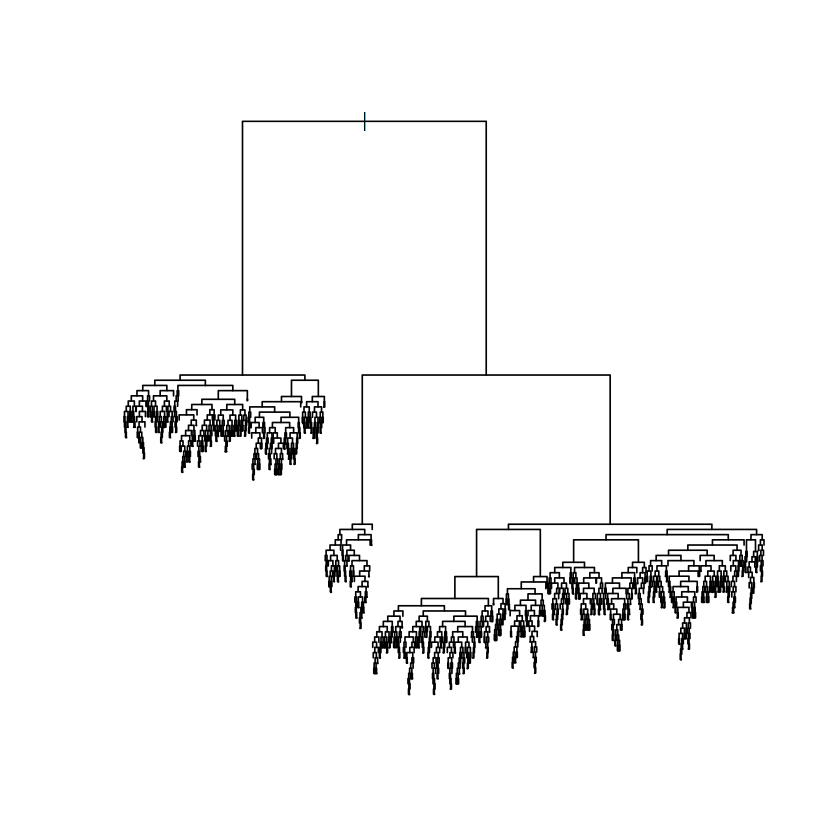

In [62]:
#plotting model

plot(full_model_tree)

Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


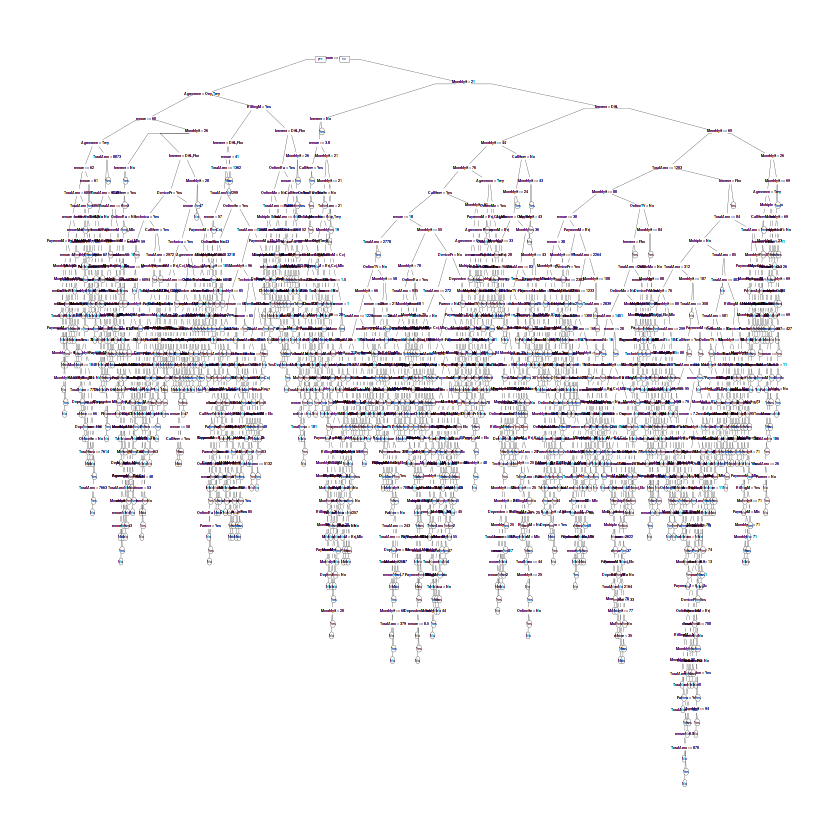

In [63]:
prp(full_model_tree)

# **Prediction using the fully grown tree**

In [64]:
#Prediction using testing dataset 

full_model_pred <- predict(full_model_tree, newdata = testing, type = "class")

In [65]:
#Predictions

full_model_pred

1     5    25    29    30    51    55    56    58    62    67    68    71 
   No    No    No    No   Yes    No    No    No    No    No    No    No    No 
   76    78    80    81    83    84    86    87    96    97    98   100   102 
   No    No    No    No    No    No    No   Yes    No   Yes    No   Yes   Yes 
  110   111   115   116   120   124   125   126   127   128   129   132   134 
   No    No    No    No   Yes    No    No    No    No    No   Yes    No    No 
  143   147   149   150   153   155   157   161   162   164   167   168   170 
   No    No    No    No    No    No    No    No    No    No    No   Yes    No 
  174   182   186   189   190   193   200   201   206   212   213   216   222 
   No    No    No    No    No    No   Yes   Yes    No    No    No    No    No 
  230   231   232   235   237   242   245   250   252   254   257   258   259 
   No    No    No    No    No    No    No    No    No    No    No    No    No 
  261   265   267   270   273   277   281   282   283   284   285   288   289 
  Yes    No    No    No    No    No    No    No   Yes    No    No    No    No 
  293   299   300   301   302   309   313   314   316   320   321   324   327 
   No    No   Yes    No    No    No    No    No    No    No    No    No   Yes 
  332   336   337   339   340   341   343   354   360   362   370   374   379 
   No    No    No    No    No    No    No   Yes    No    No    No    No    No 
  389   391   393   395   399   400   407   411   412   413   415   418   419 
   No    No    No    No   Yes    No    No    No   Yes    No    No    No    No 
  420   423   430   432   433   437   438   447   448   455   457   465   467 
   No    No    No    No    No    No    No    No    No    No   Yes   Yes    No 
  473   483   484   488   489   492   495   498   500   501   503   504   510 
   No    No    No    No    No    No    No    No    No    No    No    No    No 
  520   527   528   533   536   545   547   551   554   558   559   560   563 
   No    No    No    No    No    No    No    No   Yes    No    No    No    No 
  571   573   584   587   590   594   603   605   606   609   610   624   632 
   No   Yes   Yes    No    No    No    No    No    No    No    No    No    No 
  635   639   641   647   650   652   653   654   655   657   658   659   661 
   No    No    No    No    No    No    No    No    No    No    No    No    No 
  662   672   673   674   675   687   689   690   691   692   693   694   696 
   No    No    No   Yes    No    No    No   Yes    No    No    No    No   Yes 
  698   706   709   710   711   714   722   723   724   728   729   730   733 
  Yes    No    No    No    No   Yes    No    No    No    No    No    No    No 
  734   738   740   750   751   770   773   784   785   787   788   793   794 
   No    No    No    No    No    No    No    No    No    No    No    No    No 
  799   800   802   804   805   806   808   815   821   823   829   833   835 
   No    No    No    No    No    No    No    No    No    No    No    No    No 
  838   843   844   847   850   851   853   854   858   859   861   862   870 
   No    No    No    No    No    No    No    No    No    No    No   Yes    No 
  871   874   875   877   878   880   892   897   900   901   904   905   911 
   No    No    No    No    No    No   Yes    No    No    No    No    No    No 
  914   916   917   918   921   925   930   932   933   935   941   949   952 
   No   Yes    No    No    No    No    No    No    No    No    No    No    No 
  959   961   963   964   967   969   970   973   984   987   996   997   998 
   No    No    No    No    No    No    No   Yes    No    No   Yes    No    No 
 1000  1012  1014  1016  1019  1020  1021  1027  1037  1038  1040  1042  1046 
   No    No    No    No    No    No    No    No    No    No    No    No    No 
 1047  1050  1054  1057  1062  1064  1066  1067  1080  1086  1087  1088  1090 
   No    No    No    No    No    No    No    No    No    No    No    No    No 
 1091  1092  1102  1105  1111  1114  1118  1119  1120 

# **Accuracy and Confusion Matrix**

In [66]:
#confusion matrix

conf_matrix_full_model <- table(testing$Churn, full_model_pred)

conf_matrix_full_model

     full_model_pred
        No  Yes
  No  1814  204
  Yes  350 1332

In [67]:
#Print out the accuracy

sum(diag(conf_matrix_full_model))/sum(conf_matrix_full_model)*100

[1] 85.02703

# **cp implementation**
 
"cp" stand for complexity parametr is used to control the size of the decision tree and to select the optimal tree size.

Smaller cp value will lead to bigger trees/complexity increases

Higher cp values will lead to smaller trees


In [68]:
library(caret)
library(e1071)

In [69]:
numfolds <- trainControl(method = "cv", number = 100)

#trainControl control parametrs for train

In [70]:
cpGrid <- expand.grid(cp=seq(0.01,.05,0.01))

In [71]:
cpGrid

cp
<dbl>
0.01
0.02
0.03
0.04
0.05


# **Checking the cross validation accuracy for cp parameters.**

In [72]:
train(Churn~., data = training, method = "rpart", trControl = numfolds, tuneGrid = cpGrid)

CART 

8635 samples
  17 predictor
   2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (100 fold) 
Summary of sample sizes: 8549, 8549, 8548, 8549, 8549, 8549, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa    
  0.01  0.7486109  0.4913721
  0.02  0.7209538  0.4482484
  0.03  0.7126031  0.4331189
  0.04  0.7116728  0.4317772
  0.05  0.7116728  0.4317772

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01.

# **Pruning the full_model_tree(fully grown model)**

In [73]:
pruned_tree <- prune(full_model_tree, cp = 0.01)

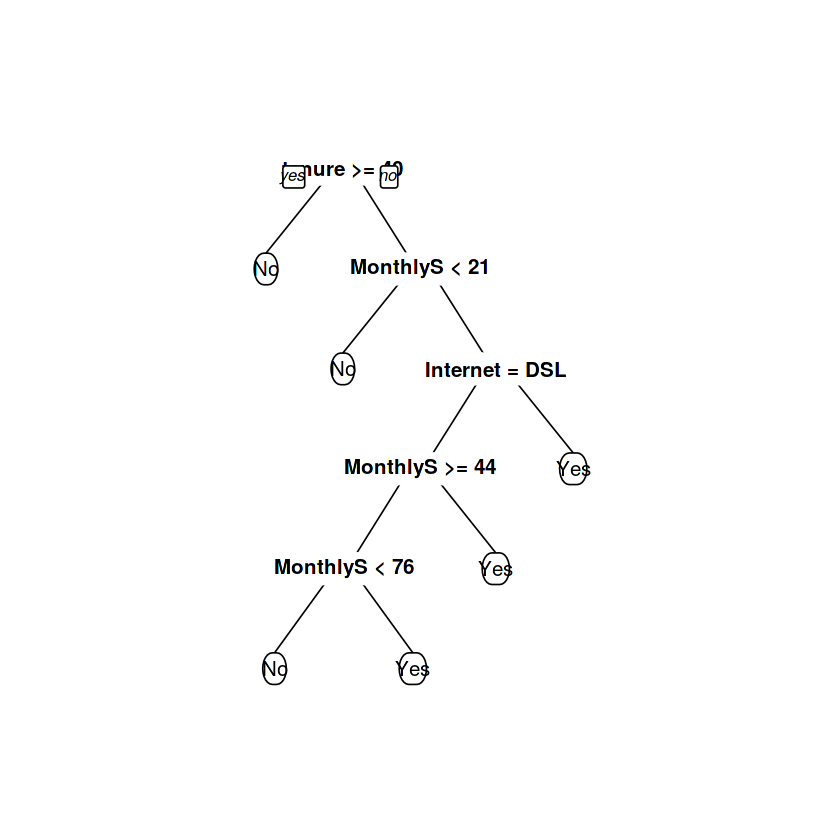

In [74]:
prp(pruned_tree)

In [75]:
printcp(pruned_tree)


Classification tree:
rpart(formula = Churn ~ ., data = training, method = "class", 
    minsplit = 0, cp = 0)

Variables actually used in tree construction:
[1] InternetConnection    MonthlyServiceCharges tenure               

Root node error: 3925/8635 = 0.45455

n= 8635 

        CP nsplit rel error  xerror     xstd
1 0.238726      0   1.00000 1.00000 0.011789
2 0.140382      1   0.76127 0.80815 0.011413
3 0.022803      2   0.62089 0.63338 0.010720
4 0.020637      4   0.57529 0.58522 0.010461
5 0.010000      5   0.55465 0.55516 0.010283


# **Prediction using the pruned tree**

In [76]:
pruned_model_pred <- predict(pruned_tree, newdata = testing, type = "class")

In [77]:
#predictions
pruned_model_pred

1     5    25    29    30    51    55    56    58    62    67    68    71 
   No   Yes    No    No   Yes    No    No    No    No   Yes    No    No    No 
   76    78    80    81    83    84    86    87    96    97    98   100   102 
   No    No   Yes    No    No   Yes    No   Yes    No   Yes    No    No   Yes 
  110   111   115   116   120   124   125   126   127   128   129   132   134 
   No   Yes    No   Yes   Yes    No    No    No    No   Yes    No    No    No 
  143   147   149   150   153   155   157   161   162   164   167   168   170 
   No   Yes    No    No    No   Yes    No    No    No    No    No   Yes    No 
  174   182   186   189   190   193   200   201   206   212   213   216   222 
   No    No    No    No    No    No   Yes   Yes    No    No    No    No    No 
  230   231   232   235   237   242   245   250   252   254   257   258   259 
   No    No    No    No    No   Yes    No    No    No    No    No    No    No 
  261   265   267   270   273   277   281   282   283   284   285   288   289 
   No    No   Yes    No    No    No   Yes    No    No   Yes    No   Yes   Yes 
  293   299   300   301   302   309   313   314   316   320   321   324   327 
   No    No    No    No    No    No    No   Yes    No    No    No   Yes    No 
  332   336   337   339   340   341   343   354   360   362   370   374   379 
   No    No    No   Yes   Yes    No    No   Yes    No    No    No    No   Yes 
  389   391   393   395   399   400   407   411   412   413   415   418   419 
  Yes    No    No   Yes   Yes    No    No    No    No   Yes    No    No    No 
  420   423   430   432   433   437   438   447   448   455   457   465   467 
  Yes    No   Yes    No    No    No    No    No    No    No   Yes    No   Yes 
  473   483   484   488   489   492   495   498   500   501   503   504   510 
   No    No    No   Yes    No    No    No    No    No   Yes    No   Yes   Yes 
  520   527   528   533   536   545   547   551   554   558   559   560   563 
   No    No    No    No    No    No    No    No    No    No    No    No    No 
  571   573   584   587   590   594   603   605   606   609   610   624   632 
   No    No    No    No    No    No    No   Yes    No    No    No   Yes    No 
  635   639   641   647   650   652   653   654   655   657   658   659   661 
   No   Yes    No    No    No    No   Yes    No   Yes    No    No    No   Yes 
  662   672   673   674   675   687   689   690   691   692   693   694   696 
   No    No   Yes   Yes    No    No   Yes   Yes    No   Yes    No   Yes   Yes 
  698   706   709   710   711   714   722   723   724   728   729   730   733 
   No    No    No    No    No    No    No    No    No    No    No    No    No 
  734   738   740   750   751   770   773   784   785   787   788   793   794 
  Yes    No    No    No    No   Yes   Yes    No    No    No    No    No    No 
  799   800   802   804   805   806   808   815   821   823   829   833   835 
   No    No    No    No    No   Yes    No    No    No   Yes   Yes    No    No 
  838   843   844   847   850   851   853   854   858   859   861   862   870 
  Yes   Yes    No    No    No    No    No    No    No    No    No    No   Yes 
  871   874   875   877   878   880   892   897   900   901   904   905   911 
   No    No    No    No    No    No   Yes    No    No    No    No    No    No 
  914   916   917   918   921   925   930   932   933   935   941   949   952 
   No    No    No    No    No    No    No    No    No    No    No    No    No 
  959   961   963   964   967   969   970   973   984   987   996   997   998 
  Yes    No    No    No   Yes    No    No   Yes    No   Yes    No    No   Yes 
 1000  1012  1014  1016  1019  1020  1021  1027  1037  1038  1040  1042  1046 
   No    No    No    No    No    No    No    No    No    No    No    No   Yes 
 1047  1050  1054  1057  1062  1064  1066  1067  1080  1086  1087  1088  1090 
   No    No    No    No   Yes   Yes    No    No    No    No    No    No   Yes 
 1091  1092  1102  1105  1111  1114  1118  1119  1120 

# **Confusion Matrix and Accuracy**

In [78]:
#Confusion Matrix
conf_matrix_pruned_model <- table(testing$Churn,pruned_model_pred)
conf_matrix_pruned_model

     pruned_model_pred
        No  Yes
  No  1568  450
  Yes  456 1226

In [79]:
#Print out the Accuracy
sum(diag(conf_matrix_pruned_model))/ sum(conf_matrix_pruned_model)

[1] 0.7551351

# **Another tree by ctree2 technique called classification tree**

In [80]:
model <- train(Churn~., data= training, method = "ctree2",
               trControl = trainControl("cv", number = 10),
               tuneGrid = expand.grid(maxdepth = 10, mincriterion = 0.95))

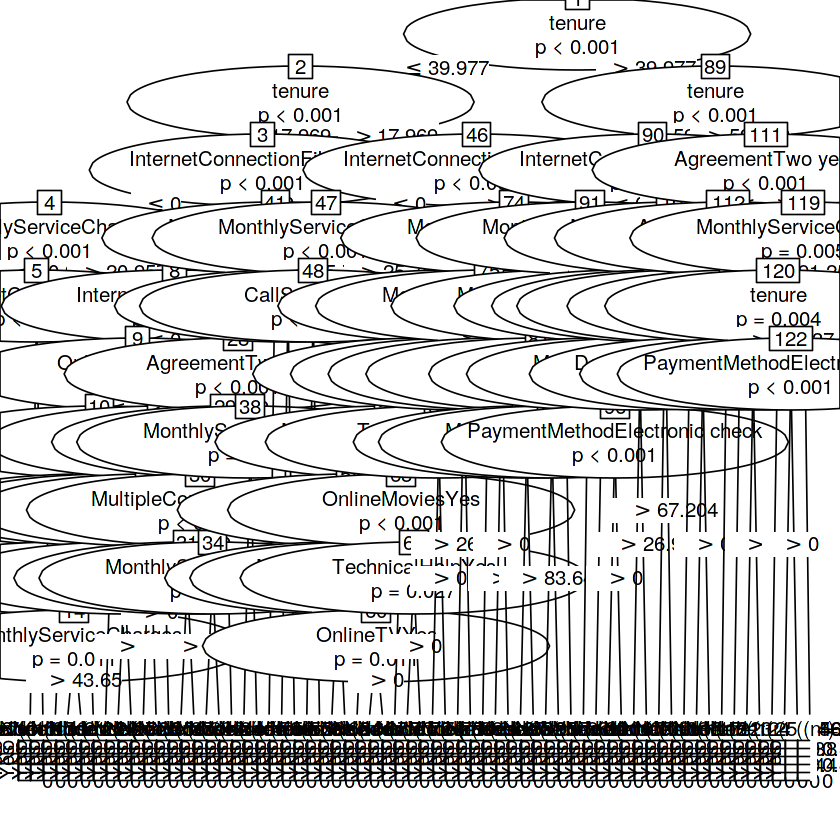

In [81]:
plot(model$finalModel)

# **Prediction using the fully grown tree**

In [82]:
model_pred <- predict(model, newdata = testing, type = "raw") 
#we can use "prob" also in type for probability

In [83]:
#predictions
model_pred

[1] No  Yes No  No  Yes No  No  No  No  No  No  No  No  No  No  No  No  No 
  [19] No  No  Yes No  Yes No  No  Yes No  Yes No  No  No  No  No  No  No  No 
  [37] No  No  No  No  Yes No  No  No  No  No  No  No  No  No  Yes No  No  No 
  [55] No  No  No  No  Yes Yes No  No  No  No  No  Yes No  No  No  No  Yes No 
  [73] No  No  No  No  No  No  No  No  No  No  No  No  Yes Yes No  No  No  No 
  [91] Yes No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [109] No  No  No  No  No  No  No  No  Yes No  No  No  Yes No  No  No  No  No 
 [127] No  No  No  No  No  No  Yes No  No  No  No  No  Yes No  Yes No  No  No 
 [145] No  No  No  No  No  No  No  No  No  No  No  Yes No  No  No  No  No  No 
 [163] No  No  Yes No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [181] No  No  No  No  No  No  No  No  Yes No  No  No  No  No  No  No  No  No 
 [199] No  No  Yes No  Yes No  Yes No  No  Yes Yes No  No  No  No  No  No  No 
 [217] No  No  No  No  No  Yes No  No  No  No  Yes No  No  No  No  No  No  No 
 [235] No  No  No  No  No  No  No  No  No  No  Yes No  No  Yes Yes No  No  No 
 [253] No  No  No  No  No  No  No  No  No  No  No  No  No  No  Yes No  No  No 
 [271] No  No  No  No  No  No  No  No  Yes No  No  No  No  No  No  No  No  No 
 [289] No  No  No  No  No  Yes No  No  No  No  Yes Yes No  No  No  No  No  No 
 [307] No  No  No  No  No  No  No  No  No  No  No  Yes No  No  No  No  No  No 
 [325] No  No  No  No  No  No  No  No  Yes No  Yes No  No  No  No  No  No  No 
 [343] No  No  No  No  No  No  No  No  No  Yes No  No  No  Yes No  No  No  Yes
 [361] No  No  No  No  Yes No  Yes No  No  No  No  No  No  No  No  No  No  No 
 [379] No  No  No  No  Yes No  No  No  No  No  Yes No  No  No  No  No  No  No 
 [397] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [415] No  No  No  No  No  No  Yes No  No  No  No  No  No  No  No  No  No  No 
 [433] Yes No  No  No  No  No  Yes No  No  No  No  No  No  No  Yes No  No  No 
 [451] Yes Yes No  Yes Yes No  No  No  No  No  No  No  No  No  No  No  No  No 
 [469] No  No  No  No  No  Yes No  No  No  No  No  Yes No  No  No  No  No  No 
 [487] No  No  No  No  Yes Yes No  No  No  No  No  No  No  No  No  No  No  Yes
 [505] No  No  No  No  No  No  Yes No  No  No  No  No  Yes No  No  No  No  No 
 [523] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [541] No  No  No  No  No  No  No  No  No  No  No  Yes No  Yes Yes No  No  No 
 [559] No  No  No  No  No  No  No  No  No  No  No  No  No  Yes No  No  No  No 
 [577] No  No  No  No  No  No  No  No  Yes No  Yes Yes No  Yes No  Yes No  No 
 [595] No  No  No  Yes No  Yes No  No  No  No  No  No  Yes No  No  No  No  No 
 [613] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  Yes No 
 [631] No  No  No  Yes No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [649] No  No  Yes No  No  No  No  No  Yes No  No  No  No  No  No  No  Yes Yes
 [667] No  No  No  No  No  No  No  Yes No  No  No  No  Yes No  No  No  Yes Yes
 [685] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
 [703] No  No  Yes No  No  No  No  Yes No  Yes No  No  No  No  No  No  No  No 
 [721] Yes No  No  No  No  No  No  Yes Yes No  No  No  No  No  No  No  No  No 
 [739] No  No  No  No  No  Yes No  No  No  No  No  Yes No  No  No  No  No  No 
 [757] No  No  No  Yes No  No  No  No  No  No  No  No  No  No  Yes No  No  No 
 [775] No  No  No  No  No  Yes No  No  No  No  No  Yes No  No  No  No  No  No 
 [793] No  No  No  No  Yes No  No  No  No  No  Yes Yes No  No  No  No  No  Yes
 [811] No  No  No  No  No  No  Yes No  No  No  No  No  No  No  No  No  No  No 
 [829] No  No  Yes No  Yes No  No  No  No  Yes No  No  No  No  No  No  Yes No 
 [847] No  Yes No  No  No  No  Yes No  No  No  No  No  No  No  No  No  No  No 
 [865] No  No  No  No  No  No  No  No  No  Yes No  No  No  No  No  No  No  Yes
 [883] Yes No  No  No  Yes No  No  No  No  No  No  No  No  No  No  No  No  Yes
 [901] No  No  No  No  No  No  No  No  No  No  No  No

# **Confusion matrix and Accuracy**

In [84]:
#Confusion Matrix
conf_matrix_model <- table(testing$Churn, model_pred)
conf_matrix_model

     model_pred
        No  Yes
  No  1801  217
  Yes  513 1169

In [85]:
#Print out the accuracy
sum(diag(conf_matrix_model))/ sum(conf_matrix_model)

[1] 0.8027027

# **Random Forest**

**Installing package "randomForest" for Random Forest.**

In [86]:
#install.packages("randomForest")
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:rattle’:

    importance


The following object is masked from ‘package:ggplot2’:

    margin




In [87]:
#Random Forest
rforest <- randomForest(Churn~., data = training, nodesize = 5, ntree = 200)
rforest


Call:
 randomForest(formula = Churn ~ ., data = training, nodesize = 5,      ntree = 200) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 4

        OOB estimate of  error rate: 14.37%
Confusion matrix:
      No  Yes class.error
No  4211  499   0.1059448
Yes  742 3183   0.1890446

# **Prediction using Random forest**

In [88]:
rforest_pred <- predict(rforest, newdata = testing)

# **Confusion Matrix and Accuracy**

In [89]:
#Confusion Matrix
conf_matrix_RF <- table(testing$Churn, rforest_pred)

conf_matrix_RF

     rforest_pred
        No  Yes
  No  1830  188
  Yes  304 1378

In [90]:
#print out the accuracy
sum(diag(conf_matrix_RF))/sum(conf_matrix_RF)*100

[1] 86.7027

**We get maximum accuracy in case of Random Forest. So our final model will be random  forest with maximum accuracy than other created models.**

In [91]:
#                        ******This is the end of Project******